In [1]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the balanced dataset
balanced_df = pd.read_csv('combined_fruits.csv')

In [3]:
balanced_df['label'].unique()

array(['Almond', 'Apple', 'Apricot', 'Avocado', 'Beans', 'Beetroot',
       'Bitter Melon', 'Bottle Gourd', 'Brinjal (Eggplant)', 'Broccoli',
       'Buckwheat', 'Cabbage', 'Capsicum (Bell Pepper)', 'Cardamom',
       'Carrot', 'Cashew', 'Cauliflower', 'Chayote', 'Chestnut',
       'Chia Seed', 'Chillies', 'Cinnamon', 'Clove', 'Coconut', 'Coffee',
       'Corn (Maize)', 'Cotton', 'Cranberries', 'Currants',
       'Custard Apple', 'Date Palm', 'Dragon Fruit', 'Elderberries',
       'Fenugreek (Methi)', 'Ginger', 'Goji Berries', 'Grapes', 'Guava',
       'Hazelnut', 'Hemp', 'Jackfruit', 'Java Plum',
       'Jujube (Chinese Date)', 'Jute', 'Kiwi', 'Kiwifruit', 'Lemons',
       'Lettuce', 'Limes', 'Loquat', 'Lychee', 'Mango', 'Medlar',
       'Millet', 'Moringa (Sitalchini)', 'Mountain Apple (Rose Apple)',
       'Oats', 'Okra', 'Olive', 'Onion', 'Orange', 'Papaya',
       'Passion Fruit', 'Peaches', 'Peanut', 'Peas', 'Pineapple', 'Plums',
       'Pomegranate', 'Pomegranates', 'Potato', 'P

In [3]:
# Feature scaling
scaler = StandardScaler()
features = balanced_df.drop('label', axis=1)
target = balanced_df['label']
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)


In [5]:
# Splitting the data into train, validation, and test sets
# Splitting the data into train and test sets
X_train, X_temp, y_train, y_temp = train_test_split(scaled_df, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
import joblib


Epoch 1: Training Accuracy: 0.4491365777080063, Validation Accuracy: 0.4407051282051282, Testing Accuracy: 0.440018315018315
Epoch 2: Training Accuracy: 0.48525313971742545, Validation Accuracy: 0.4778846153846154, Testing Accuracy: 0.47834249084249086
Epoch 3: Training Accuracy: 0.5066620879120879, Validation Accuracy: 0.49986263736263736, Testing Accuracy: 0.5005494505494505
Epoch 4: Training Accuracy: 0.5215659340659341, Validation Accuracy: 0.5144230769230769, Testing Accuracy: 0.5154304029304029
Epoch 5: Training Accuracy: 0.5342621664050236, Validation Accuracy: 0.5254120879120879, Testing Accuracy: 0.5268315018315018
Epoch 6: Training Accuracy: 0.5449568288854003, Validation Accuracy: 0.5327380952380952, Testing Accuracy: 0.5345695970695971
Epoch 7: Training Accuracy: 0.5532476452119309, Validation Accuracy: 0.541529304029304, Testing Accuracy: 0.5439102564102564
Epoch 8: Training Accuracy: 0.5610773155416012, Validation Accuracy: 0.547985347985348, Testing Accuracy: 0.550915750

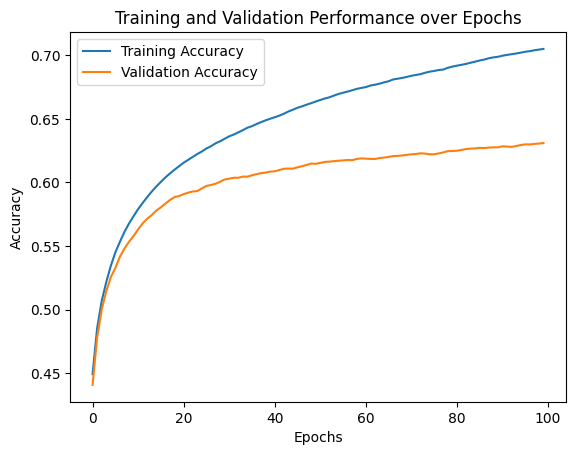

MLP Training Accuracy:  0.7050039246467817
MLP Accuracy on Validation Set:  0.6309981684981685
MLP Accuracy on Test Set:  0.630540293040293


In [7]:
from sklearn.neural_network import MLPClassifier

# Define the MLP model
MLP = MLPClassifier(
    hidden_layer_sizes=(165, 55, 165),
    activation='tanh',
    solver='adam',
    learning_rate='adaptive',
    max_iter=100,
    random_state=0)

# Initialize lists to store training, validation, and testing accuracies
training_accuracies = []
validation_accuracies = []
testing_accuracies = []

# Train the MLP model and keep track of training, validation, and testing accuracies
for epoch in range(1, MLP.max_iter + 1): 
    MLP.partial_fit(X_train, y_train, classes=np.unique(y_train))
    training_accuracy = MLP.score(X_train, y_train)
    validation_accuracy = MLP.score(X_val, y_val)
    testing_accuracy = MLP.score(X_test, y_test)
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)
    testing_accuracies.append(testing_accuracy)
    print(f"Epoch {epoch}: Training Accuracy: {training_accuracy}, Validation Accuracy: {validation_accuracy}, Testing Accuracy: {testing_accuracy}")

# Plotting training and validation accuracy over epochs
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Performance over Epochs')
plt.legend()
plt.show()

# Calculate final training accuracy
training_accuracy_mlp = training_accuracies[-1]
print("MLP Training Accuracy: ", training_accuracy_mlp)

# Calculate and print final validation accuracy
accuracy_val_mlp = validation_accuracies[-1]
print("MLP Accuracy on Validation Set: ", accuracy_val_mlp)


# Calculate and print final testing accuracy
mlp_accuracy= testing_accuracies[-1]
print("MLP Accuracy on Test Set: ", mlp_accuracy)


# Save the trained MLP model
filename_mlp = 'mlp_model.pkl'
with open(filename_mlp, 'wb') as file:
    joblib.dump(MLP, file)


In [15]:
predicted_values = MLP.predict(X_test)
print(classification_report(y_test, predicted_values))

                             precision    recall  f1-score   support

                     Almond       0.50      0.36      0.42       224
                      Apple       0.99      0.99      0.99       240
                    Apricot       0.79      0.65      0.71       254
                    Avocado       0.66      0.57      0.61       257
                      Beans       0.27      0.61      0.37       240
                   Beetroot       0.39      0.40      0.40       225
               Bitter Melon       0.51      0.33      0.40       255
               Bottle Gourd       0.34      0.46      0.39       230
         Brinjal (Eggplant)       0.59      0.36      0.44       241
                   Broccoli       0.43      0.48      0.45       239
                  Buckwheat       0.77      0.74      0.75       229
                    Cabbage       0.43      0.44      0.44       258
     Capsicum (Bell Pepper)       0.29      0.34      0.31       225
                   Cardamom      

In [8]:
from sklearn.ensemble import RandomForestClassifier
# Training the Random Forest Classifier
RF = RandomForestClassifier(
    criterion='gini',
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=1000,  
    random_state=0)

# Train the random forest model
RF.fit(X_train, y_train)

# Calculate training accuracy
training_accuracy = RF.score(X_train, y_train)
print("Random Forest Training Accuracy: ", training_accuracy)

# Predicting on the validation set
predicted_values_val = RF.predict(X_val)

# Calculating accuracy on validation set
accuracy_val = accuracy_score(y_val, predicted_values_val)
print("Random Forest Accuracy on Validation Set: ", accuracy_val)

# Predicting on the test set
predicted_values_test = RF.predict(X_test)

# Calculating accuracy on test set
rf_accuracy= accuracy_score(y_test, predicted_values_test)
print("Random Forest Accuracy on Test Set: ", rf_accuracy)


# Save the trained model
filename = 'rf_model.pkl'
with open(filename, 'wb') as file:
    joblib.dump(RF, file)

Random Forest Training Accuracy:  0.585429748822606
Random Forest Accuracy on Validation Set:  0.57257326007326
Random Forest Accuracy on Test Set:  0.5749542124542124


In [16]:
# Printing classification report
print(classification_report(y_test, predicted_values_test))

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                             precision    recall  f1-score   support

                     Almond       0.67      0.09      0.16       224
                      Apple       0.94      1.00      0.97       240
                    Apricot       0.88      0.39      0.54       254
                    Avocado       0.94      0.33      0.49       257
                      Beans       0.24      0.55      0.33       240
                   Beetroot       0.50      0.20      0.29       225
               Bitter Melon       0.57      0.47      0.51       255
               Bottle Gourd       0.38      0.17      0.23       230
         Brinjal (Eggplant)       0.38      0.59      0.46       241
                   Broccoli       0.20      0.96      0.33       239
                  Buckwheat       0.95      0.55      0.70       229
                    Cabbage       0.38      0.50      0.43       258
     Capsicum (Bell Pepper)       0.30      0.06      0.10       225
                   Cardamom      

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, predicted_values_test))

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree Classifier 
DT = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    ccp_alpha=0.0,
    max_depth=15,
    random_state=0
)

# Train the Decision Tree Classifier
DT.fit(X_train, y_train)

# Calculate training accuracy
training_accuracy_dt = DT.score(X_train, y_train)
print("Decision Tree Training Accuracy: ", training_accuracy_dt)

# Predicting on the validation set
predicted_values_val_dt = DT.predict(X_val)

# Calculating accuracy on validation set
accuracy_val_dt = accuracy_score(y_val, predicted_values_val_dt)
print("Decision Tree Accuracy on Validation Set: ", accuracy_val_dt)

# Predicting on the test set
predicted_values_test_dt = DT.predict(X_test)

# Calculating accuracy on test set
dt_accuracy = accuracy_score(y_test, predicted_values_test_dt)
print("Decision Tree Accuracy on Test Set: ", dt_accuracy)

# Save the trained model
filename_dt = 'dt_model.pkl'
with open(filename_dt, 'wb') as file_dt:
    joblib.dump(DT, file_dt)


Decision Tree Training Accuracy:  0.5454179748822606
Decision Tree Accuracy on Validation Set:  0.5111721611721611
Decision Tree Accuracy on Test Set:  0.5134615384615384


In [17]:
print(classification_report(y_test, predicted_values_test_dt))

                             precision    recall  f1-score   support

                     Almond       0.36      0.18      0.24       224
                      Apple       0.94      0.97      0.96       240
                    Apricot       0.48      0.50      0.49       254
                    Avocado       0.69      0.39      0.50       257
                      Beans       0.16      0.75      0.27       240
                   Beetroot       0.38      0.08      0.13       225
               Bitter Melon       0.38      0.29      0.33       255
               Bottle Gourd       0.40      0.36      0.38       230
         Brinjal (Eggplant)       0.36      0.45      0.40       241
                   Broccoli       0.32      0.37      0.34       239
                  Buckwheat       0.62      0.49      0.55       229
                    Cabbage       0.22      0.76      0.34       258
     Capsicum (Bell Pepper)       0.20      0.18      0.19       225
                   Cardamom      

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# Train the SVM model
svm = SVC(
    C=0.5, 
    kernel='rbf', 
    max_iter=10, 
    tol=1e-5)
svm.fit(X_train, y_train)

# Evaluate the model on the training set
accuracy_train_svm = svm.score(X_train, y_train)
print("SVM Training Accuracy: ", accuracy_train_svm)

# Evaluate the model on the validation set
predicted_values_val_svm = svm.predict(X_val)
accuracy_val_svm = accuracy_score(y_val, predicted_values_val_svm)
print("SVM Accuracy on Validation Set: ", accuracy_val_svm)

# Evaluate the model on the test set
predicted_values_test_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, predicted_values_test_svm)
print("SVM Accuracy on Test Set: ", svm_accuracy)

# Save the trained SVM model
filename_svm = 'svm_model.pkl'
with open(filename_svm, 'wb') as file_svm:
    joblib.dump(svm, file_svm)


c:\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Training Accuracy:  0.3113324175824176
SVM Accuracy on Validation Set:  0.30924908424908426
SVM Accuracy on Test Set:  0.308470695970696


In [18]:
print(classification_report(y_test, predicted_values_test_svm))

                             precision    recall  f1-score   support

                     Almond       0.05      0.35      0.09       224
                      Apple       0.91      0.99      0.95       240
                    Apricot       0.07      0.65      0.13       254
                    Avocado       0.21      0.31      0.25       257
                      Beans       0.12      0.05      0.07       240
                   Beetroot       0.10      0.16      0.12       225
               Bitter Melon       0.21      0.50      0.29       255
               Bottle Gourd       0.16      0.14      0.15       230
         Brinjal (Eggplant)       0.30      0.61      0.40       241
                   Broccoli       0.33      0.28      0.30       239
                  Buckwheat       0.30      0.20      0.24       229
                    Cabbage       0.27      0.15      0.19       258
     Capsicum (Bell Pepper)       0.19      0.03      0.05       225
                   Cardamom      

MLP Accuracy: 0.630540293040293
Random Forest Accuracy: 0.5749542124542124
Decision Tree Accuracy: 0.5134615384615384
SVM Accuracy: 0.308470695970696


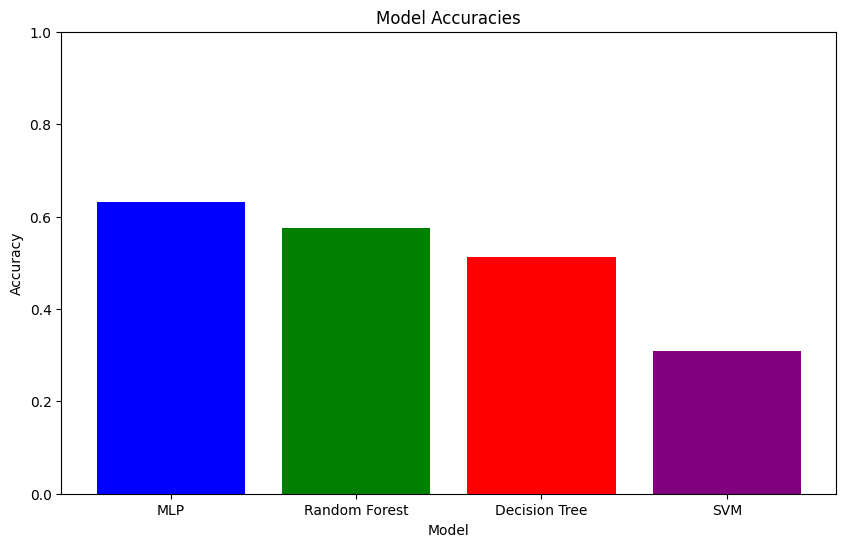

In [11]:
# Define the accuracies and model names
model_accuracies = [mlp_accuracy, rf_accuracy, dt_accuracy, svm_accuracy]
model_names = ["MLP", "Random Forest", "Decision Tree", "SVM"]

# Print accuracies
for model_name, accuracy in zip(model_names, model_accuracies):
    print(f"{model_name} Accuracy: {accuracy}")

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy ranges from 0 to 1
plt.show()

In [12]:
import joblib

# Save the best model
import shutil

# Assuming you have variables mlp_accuracy and rf_accuracy containing their accuracies
best_model = max([("mlp_model.pkl", mlp_accuracy), ("rf_model.pkl", rf_accuracy),("best_dt_model.pkl",dt_accuracy),("best_svm_model.pkl",svm_accuracy)], key=lambda x: x[1])

print("Best Model:", best_model[0])
print("Accuracy:", best_model[1])

# Destination filename
destination_filename = 'ok.pkl'

# Copy the selected model file to the destination
shutil.copyfile(best_model[0], destination_filename)


Best Model: mlp_model.pkl
Accuracy: 0.630540293040293


'ok.pkl'

In [4]:
import joblib
import numpy as np

# Load the best model
with open('ok.pkl', 'rb') as file:
    best_model = joblib.load(file)


# User input
user_input = np.array([[6.79,21.39,48.23,2297,805.54,104,17,231]])

# Scale the user input using the fitted scaler
scaled_input = scaler.transform(user_input)

# Convert the scaled input to string format
scaled_input_string = ','.join(map(str, scaled_input[0]))

user_input_values = list(map(float, scaled_input_string.split(',')))

# Use the best model to predict the crop
predicted_crop = best_model.predict([user_input_values])[0]

print("Recommended Crop:", predicted_crop)


Recommended Crop: Apple


c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [5]:
import serial
from time import sleep
sre = serial.Serial("COM4", 9600, timeout=1)

def getSensorData():
    line = sre.readline()
    string = line.decode(errors="replace")
    return string

In [6]:
print(getSensorData())

{"humi":38.3,"tempC":21.4,"pH":7.276693,"Nitrogen":255,"Phosphorous":45,"Potassium":63}



In [6]:
import geocoder
import json
import requests


location = geocoder.ip('me')

Latitude = location.latlng[0]
Longitude = location.latlng[1]

with open('rainfall.json') as f:
    data = json.load(f)

def get_location_name(lat, lon):
    nominatim_url = f'https://nominatim.openstreetmap.org/reverse?format=json&lat={lat}&lon={lon}&accept-language=en'
    response = requests.get(nominatim_url)
    location_json = response.json()

    if 'address' in location_json:
        address = location_json['address']
        if address.get('country_code') != 'NP':
            return address.get('city', '')
        else:
           return address.get('town', '')
    else:
        return 'Location not found'

location_name = get_location_name(Latitude, Longitude)
print(location_name)

Rainfall = ""

for station in data:
   
    if station['loction'] == location_name:
        
        print(f"Rainfall for {location_name}: {station['rainfall']} mm")

        Rainfall = station["rainfall"]

Kathmandu
Rainfall for Kathmandu: 1279.3 mm


In [9]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Load the model and necessary data using joblib
ok = joblib.load('ok.pkl')



# Load the fertilizer dataset
df = pd.read_csv('fertilizer1.csv')

fertilizer_dic = {
    'NHigh': """The N value of soil is high and might give rise to weeds.
        Please consider the following suggestions:

        1. Manure – adding manure is one of the simplest ways to amend your soil with nitrogen.
        2. Coffee grinds – use your morning addiction to feed your gardening habit! Coffee grinds are considered a green compost material which is rich in nitrogen.
        3. Plant nitrogen-fixing plants – planting vegetables that are in the Fabaceae family like peas, beans, and soybeans have the ability to increase nitrogen in your soil
        4. Plant ‘green manure’ crops like cabbage, corn, and broccoli
        5. Use mulch (wet grass) while growing crops - Mulch can also include sawdust and scrap softwoods""",

    'Nlow': """The N value of your soil is low.
        Please consider the following suggestions:
        1. Add sawdust or fine wood chips to your soil – the carbon in the sawdust/wood chips loves nitrogen and will help absorb and soak up excess nitrogen.
        2. Plant heavy nitrogen-feeding plants – tomatoes, corn, broccoli, cabbage, and spinach are examples of plants that thrive off nitrogen and will suck the nitrogen dry.
        3. Water – soaking your soil with water will help leach the nitrogen deeper into your soil, effectively leaving less for your plants to use.
        4. Sugar – In limited studies, it was shown that adding sugar to your soil can help potentially reduce the amount of nitrogen in your soil.
        5. Add composted manure to the soil.
        6. Plant Nitrogen-fixing plants like peas or beans.
        7. Use NPK fertilizers with high N value.
        8. Do nothing – It may seem counter-intuitive, but if you already have plants that are producing lots of foliage, it may be best to let them continue to absorb all the nitrogen to amend the soil for your next crops.""",

    'PHigh': """The P value of your soil is high.
        Please consider the following suggestions:
        1. Avoid adding manure – manure contains many key nutrients for your soil but typically includes high levels of phosphorous. Limiting the addition of manure will help reduce phosphorus being added.
        2. Use only phosphorus-free fertilizer – if you can limit the amount of phosphorus added to your soil, you can let the plants use the existing phosphorus while still providing other key nutrients such as Nitrogen and Potassium. Find a fertilizer with numbers such as 10-0-10, where the zero represents no phosphorous.
        3. Water your soil – soaking your soil liberally will aid in driving phosphorous out of the soil. This is recommended as a last-ditch effort.
        4. Plant nitrogen-fixing vegetables to increase nitrogen without increasing phosphorous (like beans and peas).
        5. Use crop rotations to decrease high phosphorous levels""",

    'Plow': """The P value of your soil is low.
        Please consider the following suggestions:
        1. Bone meal – a fast-acting source that is made from ground animal bones which are rich in phosphorous.
        2. Rock phosphate – a slower-acting source where the soil needs to convert the rock phosphate into phosphorous that the plants can use.
        3. Phosphorus Fertilizers – applying a fertilizer with a high phosphorous content in the NPK ratio (example: 10-20-10, 20 being phosphorous percentage).
        4. Organic compost – adding quality organic compost to your soil will help increase phosphorous content.
        5. Manure – as with compost, manure can be an excellent source of phosphorous for your plants.
        6. Clay soil – introducing clay particles into your soil can help retain & fix phosphorus deficiencies.
        7. Ensure proper soil pH – having a pH in the 6.0 to 7.0 range has been scientifically proven to have the optimal phosphorus uptake in plants.
        8. If soil pH is low, add lime or potassium carbonate to the soil as fertilizers. Pure calcium carbonate is very effective in increasing the pH value of the soil.
        9. If pH is high, addition of appreciable amount of organic matter will help acidify the soil. Application of acidifying fertilizers, such as ammonium sulfate, can help lower soil pH""",

    'KHigh': """The K value of your soil is high.
        Please consider the following suggestions:
        1. Loosen the soil deeply with a shovel, and water thoroughly to dissolve water-soluble potassium. Allow the soil to fully dry, and repeat digging and watering the soil two or three more times.
        2. Sift through the soil, and remove as many rocks as possible, using a soil sifter. Minerals occurring in rocks such as mica and feldspar slowly release potassium into the soil slowly through weathering.
        3. Stop applying potassium-rich commercial fertilizer. Apply only commercial fertilizer that has a '0' in the final number field. Commercial fertilizers use a three-number system for measuring levels of nitrogen, phosphorous, and potassium. The last number stands for potassium. Another option is to stop using commercial fertilizers altogether and to begin using only organic matter to enrich the soil.
        4. Mix crushed eggshells, crushed seashells, wood ash, or soft rock phosphate to the soil to add calcium. Mix in up to 10 percent of organic compost to help amend and balance the soil.
        5. Use NPK fertilizers with low K levels and organic fertilizers since they have low NPK values.
        6. Grow a cover crop of legumes that will fix nitrogen in the soil. This practice will meet the soil’s needs for nitrogen without increasing phosphorus or potassium.""",

    'Klow': """The K value of your soil is low.
        Please consider the following suggestions:
        1. Mix in muricate of potash or sulphate of potash
        2. Try kelp meal or seaweed
        3. Try Sul-Po-Mag
        4. Bury banana peels an inch below the soil's surface
        5. Use Potash fertilizers since they contain high values of potassium"""
}

def Suggestion():
    
    dht22Data = json.loads(getSensorData())

    pH = dht22Data["pH"]
    tempC = dht22Data["tempC"]
    humi = dht22Data["humi"]
    Nitrogen = dht22Data["Nitrogen"]
    Phosphorous = dht22Data["Phosphorous"]
    Potassium = dht22Data["Potassium"]

    columns = ['ph', 'temperature', 'humidity', 'altitude', 'rainfall', 'N', 'P', 'K']

    # Column names for the user input
    user_input = pd.DataFrame([[pH, tempC, humi, Rainfall, 1338.27, Nitrogen, Phosphorous, Potassium]], columns=columns)

    # Scale the user input using the fitted scaler
    scaled_input = scaler.transform(user_input)

    # Use the best model to predict the crop
    predicted_crop = ok.predict(scaled_input)[0]


    print("Recommended Crop:", predicted_crop)


    # Ensure case-insensitivity and remove whitespaces
    df = pd.read_csv('fertilizer1.csv', header=0, skipinitialspace=True)

    # Get the N, P, K content for the predicted crop from the fertilizer dataset
    crop_data = df[df['Crop'].str.strip().str.lower() == predicted_crop.lower()]

    nitrogen_content = crop_data['N'].iloc[0]
    phosphorus_content = crop_data['P'].iloc[0]
    potassium_content = crop_data['K'].iloc[0]


    # Compare NPK content
    if nitrogen_content > phosphorus_content and nitrogen_content > potassium_content:
        print(f"The nitrogen content is high for {predicted_crop}.")
    elif phosphorus_content > nitrogen_content and phosphorus_content > potassium_content:
        print(f"The phosphorus content is high for {predicted_crop}.")
    else:
        print(f"The potassium content is high for {predicted_crop}.")

    # Print the fertilizer recommendation based on NPK levels
    n_diff = nitrogen_content - user_input['N'].iloc[0]
    p_diff = phosphorus_content - user_input['P'].iloc[0]
    k_diff = potassium_content - user_input['K'].iloc[0]

    # Determine which nutrient is most lacking
    nutrient_deficiency = max(n_diff, p_diff, k_diff)

    # Print the corresponding fertilizer recommendation
    if nutrient_deficiency == n_diff:
        key = 'NHigh' if n_diff < 0 else 'Nlow'
    elif nutrient_deficiency == p_diff:
        key = 'PHigh' if p_diff < 0 else 'Plow'
    else:
        key = 'KHigh' if k_diff < 0 else 'Klow'

    fertilizer_recommendation = fertilizer_dic.get(key, "Unknown")
    return fertilizer_recommendation

In [7]:
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
import json
app = FastAPI()

best_model = None
with open('ok.pkl', 'rb') as file:
    best_model = joblib.load(file)

origins = ["*"]

app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],  # Allow all HTTP methods
    allow_headers=["*"],  # Allow all HTTP headers
)

@app.get("/")
def read_root():

    return { "main_data": json.loads(getSensorData()), "rainfall": Rainfall, "altitude": 1338.27}

@app.get("/result")
def get_result():
    dht22Data = json.loads(getSensorData())

    pH = dht22Data["pH"]
    tempC = dht22Data["tempC"]
    humi = dht22Data["humi"]
    Nitrogen = dht22Data["Nitrogen"]
    Phosphorous = dht22Data["Phosphorous"]
    Potassium = dht22Data["Potassium"]

    # print(rainfall)
    
    user_input = np.array([[pH, tempC, humi, Rainfall, 1338.27, Nitrogen, Phosphorous, Potassium]])

    # Scale the user input using the fitted scaler
    scaled_input = scaler.transform(user_input)

    # Convert the scaled input to string format
    scaled_input_string = ','.join(map(str, scaled_input[0]))

    user_input_values = list(map(float, scaled_input_string.split(',')))

    # Use the best model to predict the crop
    predicted_crop = best_model.predict([user_input_values])[0]

    # return Response(content=predicted_crop, headers={'Access-Control-Allow-Origin': 'http://localhost:5173'})
    
    return ({"name": predicted_crop })

@app.get("/suggestion")

def getSuggestion():
    suggestion = Suggestion()
    return {"suggestion" : suggestion }


In [ ]:
import asyncio
import uvicorn

if __name__ == "__main__":
    config = uvicorn.Config(app)
    server = uvicorn.Server(config)
    loop = asyncio.get_running_loop()
    loop.create_task(server.serve())

INFO:     Started server process [21488]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:52845 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:52845 - "GET /result HTTP/1.1" 200 OK


c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


INFO:     127.0.0.1:52845 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:52845 - "GET /result HTTP/1.1" 200 OK


c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


INFO:     127.0.0.1:52848 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:52848 - "GET /result HTTP/1.1" 200 OK


c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


INFO:     127.0.0.1:52869 - "GET /result HTTP/1.1" 200 OK
INFO:     127.0.0.1:52869 - "GET /result HTTP/1.1" 200 OK
INFO:     127.0.0.1:52869 - "GET /suggestion HTTP/1.1" 500 Internal Server Error


c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 412, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-package

INFO:     127.0.0.1:52876 - "GET /suggestion HTTP/1.1" 500 Internal Server Error


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 412, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\uvicorn\middleware\proxy_headers.py", line 84, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\fastapi\applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "c:\Python312\Lib\site-packages\starlette\applications.py", line 123, in __call__
    await self.middleware_stack(scope, receive, send)
  File "c:\Python312\Lib\site-packages\starlette\middleware\errors.py", line 186, in __call__
    raise exc
  File "c:\Python312\Lib\site-packages\starlette\middleware\errors.py", line 164, in __call__
    await self.app(scope, recei

INFO:     127.0.0.1:52877 - "GET /result HTTP/1.1" 200 OK
INFO:     127.0.0.1:52878 - "GET /result HTTP/1.1" 200 OK
INFO:     127.0.0.1:52878 - "GET /suggestion HTTP/1.1" 500 Internal Server Error


c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 412, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-package

INFO:     127.0.0.1:52877 - "GET /suggestion HTTP/1.1" 500 Internal Server Error


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 412, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\uvicorn\middleware\proxy_headers.py", line 84, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\fastapi\applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "c:\Python312\Lib\site-packages\starlette\applications.py", line 123, in __call__
    await self.middleware_stack(scope, receive, send)
  File "c:\Python312\Lib\site-packages\starlette\middleware\errors.py", line 186, in __call__
    raise exc
  File "c:\Python312\Lib\site-packages\starlette\middleware\errors.py", line 164, in __call__
    await self.app(scope, recei

INFO:     127.0.0.1:52879 - "GET /result HTTP/1.1" 200 OK
INFO:     127.0.0.1:52880 - "GET /result HTTP/1.1" 200 OK
Recommended Crop: Peaches
The potassium content is high for Peaches.
INFO:     127.0.0.1:52880 - "GET /suggestion HTTP/1.1" 200 OK
Recommended Crop: Peaches
The potassium content is high for Peaches.
INFO:     127.0.0.1:52879 - "GET /suggestion HTTP/1.1" 200 OK


c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.wa